In [1]:
#sex_encoding = defaultdict(lambda : 0, {'M': '1', 'F':'2'})
#sex_encoder = lambda x: sex_encoding[x] 
import sys
sys.path.append('/tscc/projects/ps-palmer/gwas/GWAS-pipeline/')
from gwas_class_auto import *

In [3]:
dd = pd.read_csv('data_dict_u01_olivier_george_oxycodone.csv')

In [4]:
df = pd.read_csv('processed_data_ready.csv', dtype= {'rfid':str})
traits = df.columns[df.columns.str.contains('regressedlr')]
descripitions = get_trait_descriptions_f('data_dict_u01_olivier_george_oxycodone.csv', traits)

In [6]:
gwas = gwas_pipe(path = f'',
             all_genotypes = '/tscc/projects/ps-palmer/gwas/databases/rounds/r10.1.1', #'round9_1.vcf.gz',
             data = df,
             project_name = 'u01_olivier_george_oxycodone',
             n_autosome = 20,
             traits = traits,
             founder_genotypes = '/tscc/projects/ps-palmer/hs_rats/Ref_panel_mRatBN7.2/Ref_panel_mRatBN7_2_chr_GT',
             snpeff_path= '/tscc/projects/ps-palmer/gwas/GWAS-pipeline/snpEff/',
             phewas_db = '/tscc/projects/ps-palmer/gwas/projects/phewasdb_rn7.parquet.gz',
             threads = 30)

regressedlr_lga_iti_maxburst_12_14          815
regressedlr_lga_iti_meannumrewards_12_14    815
regressedlr_lga_iti_median_12_14            642
regressedlr_lga_iti_numburst_01_02          815
regressedlr_lga_iti_numburst_12_14          815
                                           ... 
regressedlr_treatments_pr_vehicle             0
regressedlr_von_frey_force_difference       791
regressedlr_von_frey_force_percent          791
regressedlr_von_frey_time_difference        787
regressedlr_von_frey_time_percent           787
Length: 96, dtype: int64
importing trait descriptions from data_dict_u01_olivier_george_oxycodone.csv


Mapping files: 100%|██████████| 3/3 [00:11<00:00,  3.79s/it]


In [ ]:
gwas.regressout('data_dict_u01_olivier_george_oxycodone.csv')

In [ ]:
gwas.SubsetAndFilter()#makefigures=False

In [ ]:
gwas.generateGRM()

In [ ]:
gwas.snpHeritability()

In [ ]:
qtls = gwas.callQTLs(NonStrictSearchDir = False)
gwas.annotate(qtls, genome = 'rn7' )

In [ ]:
gwas.effectsize(pd.read_csv(f'{gwas.path}results/qtls/finalqtl.csv')) 

In [ ]:
gwas.genetic_correlation_matrix()

In [ ]:
gwas.manhattanplot(display = False)

In [ ]:
_ = gwas.porcupineplot(pd.read_csv(f'results/qtls/finalqtl.csv'), display = False, qtl_annotation=True)

In [ ]:
gwas.phewas(pd.read_csv(f'results/qtls/finalqtl.csv').set_index('SNP'), annotate=True, pval_threshold = 1e-4,
            nreturn = 1, r2_threshold = .4, annotate_genome = 'rn7') 

In [ ]:
gwas.eQTL(pd.read_csv(f'results/qtls/finalqtl.csv').set_index('SNP'),
          annotate= True, genome = 'rn7')

In [ ]:
gwas.sQTL(pd.read_csv(f'results/qtls/finalqtl.csv').set_index('SNP'),
          genome = 'rn7')

In [5]:
gwas.locuszoom(pd.read_csv(f'results/qtls/finalqtl.csv'), padding=3e6,
               annotate_genome = 'rn7', skip_ld_calculation=True)

generating locuszoom info for project u01_olivier_george_oxycodone
starting interactive locuszoom generator...
reading gene list from NCBI RefSeq from NCBI GTF...


100%|██████████| 15/15 [04:28<00:00, 17.91s/it]


In [ ]:
gwas.report(round_version='10.1.1', reportpath = '/projects/ps-palmer/gwas/GWAS-pipeline/gwas_report_auto.rmd',
            gwas_version='v0.2.0')

In [ ]:
gwas.store(researcher='tsanches',round_version='10.1.1',
           gwas_version='v0.1.1-33-g867d6cf',  remove_folders=False)

In [ ]:
gwas.copy_results()

In [ ]:
gwas.print_watermark()

In [ ]:
linkdict = {'rn7':f'http://hgdownload.soe.ucsc.edu/goldenPath/rn7/bigZips/genes/ncbiRefSeq.gff.gz' , 
            'rn6':'https://hgdownload.soe.ucsc.edu/goldenPath/rn6/bigZips/genes/rn6.ncbiRefSeq.gtf.gz',
           'm38': 'https://hgdownload.soe.ucsc.edu/goldenPath/mm10/bigZips/genes/mm10.ncbiRefSeq.gtf.gz'}
gtf = pd.read_csv(linkdict['rn7'], sep = '\t', header = None)\
           .set_axis(['Chr', 'source', 'biotype', 'start', 'end', 'score', 'strand', 'phase', 'ID'], axis = 1)

In [7]:
self = gwas

In [8]:
def get_ncbi_gtf(genome):
    linkdict = {'rn7':f'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/015/227/675/GCF_015227675.2_mRatBN7.2/GCF_015227675.2_mRatBN7.2_genomic.gtf.gz' , 
                    'rn6':'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/895/GCF_000001895.5_Rnor_6.0/GCF_000001895.5_Rnor_6.0_genomic.gtf.gz',
                   'm38': 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/635/GCF_000001635.26_GRCm38.p6/GCF_000001635.26_GRCm38.p6_genomic.gtf.gz'}
    gtf = pd.read_csv(linkdict[genome], sep = '\t', header = None, comment='#')\
               .set_axis(['Chr', 'source', 'biotype', 'start', 'end', 'score', 'strand', 'phase', 'ID'], axis = 1)
    gtf = gtf[gtf.biotype != 'transcript']
    gtf['biotype'] = gtf['biotype'].str.replace('gene','transcript')
    gtf['gene'] = gtf.ID.str.extract('gene_id "([^"]+)"')
    gtf = gtf[~gtf.gene.str.contains('-ps')]
    gtf['Chr'] = gtf['Chr'].map(lambda x: translatechr[x])
    gtf = gtf[~gtf.Chr.str.lower().str.contains('un')]
    gtf = gtf.dropna(subset = 'gene')
    gtf = gtf[~gtf.gene.str.startswith('LOC')&~gtf.gene.str.startswith('NEW')]
    gtf['Chr'] = gtf['Chr'].map(lambda x: self.replaceXYMTtonums(x.split('_')[0]))
    return gtf
    
def jzfy(s, name = 'o'):
    x, y = zip(*[y for x in s.split(';') if (y:= x.split('='))])
    return pd.Series(y, index = x, name = name)

gtf = get_ncbi_gtf('rn7')

#%time pd.concat(gff[:100000].ID.map(jzfy).to_list(), axis = 1).T.reset_index(drop= True)

In [27]:
def locuszoom_interactive(self, qtltable:pd.DataFrame() = pd.read_csv(f'results/qtls/finalqtl.csv'), gtf = gtf,
                          threshold: float = 5.3591, suggestive_threshold: float = 5.58, qtl_r2_thresh: float = .5, 
                          padding: float = 5e5, annotate_genome: str = 'rn7'):
    
    printwithlog('starting interactive locuszoom generator...')    
    printwithlog('reading gene list from NCBI RefSeq from UCSC...')
    #gtf = get_ncbi_gtf('rn7')
    def glk(gene):
        return f'<a href="https://www.genecards.org/cgi-bin/carddisp.pl?gene={gene}">{gene}</a>'
    def rn(x,n = 3):
        try: o = round(float(x), int(n))
        except: o = x
        return o

    for _, topsnp in tqdm(list(qtltable.reset_index().iterrows())[4:5]):
        #printwithlog(f'starting interactive locuszoom for SNP {topsnp.SNP}...')
        data = pd.read_csv(f'{self.path}results/lz/lzplottable@{topsnp.trait}@{topsnp.SNP}.tsv', sep = '\t')
        data['-log10(P)'] = -np.log10(data.p) 
        minval, maxval = data.query(f'R2 > {qtl_r2_thresh}').agg({'bp': [min, max]}).values.flatten() + np.array([-padding, padding])
        #minval = max(minval, data.bp.min())
        #maxval = min(maxval, data.bp.max())
        genes_in_section = gtf.query(f'Chr == {topsnp.Chr} and  end > {minval} and start < {maxval}').reset_index(drop = True)
        causal = pd.read_csv(f'{self.path}results/qtls/possible_causal_snps.tsv' , sep = '\t')\
                   .query(f'SNP_qtl == "{topsnp.SNP}"')
        causal['bp'] = causal.SNP.str.extract(':(\d+)')
        causal = causal.merge(data[['SNP', '-log10(P)']], on='SNP')

        phewas = pd.read_csv(f'{self.path}results/phewas/pretty_table_both_match.tsv' , sep = '\t')\
                   .query(f'SNP_QTL == "{topsnp.SNP}"')
        phewas['bp'] = phewas.SNP_PheDb.str.extract(':(\d+)')
        phewas = phewas.merge(data[['SNP', '-log10(P)']], left_on='SNP_PheDb', right_on='SNP')

        eqtl = pd.read_csv(f'{self.path}results/eqtl/pretty_eqtl_table.csv' )
        eqtl['SNP'] = eqtl['SNP'].str.replace('chr', '')#\
        eqtl = eqtl.query(f'SNP == "{topsnp.SNP}"')
        eqtl['bp'] = eqtl.SNP_eqtldb.str.extract(':(\d+)')
        eqtl = eqtl.merge(data[['SNP', '-log10(P)']], left_on='SNP_eqtldb', right_on='SNP')

        sqtl = pd.read_csv(f'{self.path}results/sqtl/pretty_sqtl_table.csv' )
        sqtl['SNP'] = sqtl['SNP'].str.replace('chr', '')#\
        sqtl = sqtl.query(f'SNP == "{topsnp.SNP}"')
        sqtl['bp'] = sqtl.SNP_sqtldb.str.extract(':(\d+)')
        sqtl = sqtl.merge(data[['SNP', '-log10(P)']], left_on='SNP_sqtldb', right_on='SNP')

        fig = px.scatter(data_frame=data.query('@minval<bp<@maxval'), x= 'bp', y= '-log10(P)', #hover_data=data.columns,ice_r
                         color = 'R2', color_continuous_scale= 'Jet', hover_data =['R2'], )
        
        fig.update_traces(marker = dict(size=10, opacity = .6, line_color = 'lightgray', line_width = 1,  symbol = 'asterisk-open'),
                          hoverinfo='none', hovertemplate='' )
        fig.add_scattergl(x = causal.bp,y = causal['-log10(P)'],mode='markers', name = 'non synonymous',
                           marker=dict( line_width = 1, size = 14, color ='orange', line_color = 'black',),
                           text = [f'{x.SNP}<br>{glk(x.gene)}:{x.annotation}<br>R2: {x.R2}' for name, x in causal.iterrows()],
                           hovertemplate='%{text}',marker_symbol = 'circle-x',  visible='legendonly')
        fig.add_scattergl(x = sqtl.bp,y = sqtl['-log10(P)'],mode='markers',name = 'sqtl',
                           marker=dict( line_width = 1, size = 14, color ='green', line_color = 'black',),
                          text = [f'{x.SNP_sqtldb}<br>tissue:{x.tissue}<br>gene:{glk(x.Ensembl_gene)}<br>-log10(p): {rn(x["-log10(pval_nominal)"])}<br>R2: {rn(x.R2)}'
                                                           for name, x in sqtl.iterrows()],  hovertemplate='%{text}',
                           marker_symbol = 'diamond-x',  visible='legendonly')
        fig.add_scattergl(x = eqtl.bp,y = eqtl['-log10(P)'],mode='markers',name = 'eqtl',
                           marker=dict( line_width = 1, size = 14, color ='green', line_color = 'black',),
                          text = [f'{x.SNP_eqtldb}<br>tissue:{x.tissue}<br>gene:{glk(x.Ensembl_gene)}<br>-log10(p): {rn(x["-log10(pval_nominal)"])}<br>R2: {rn(x.R2)}'
                                                           for name, x in eqtl.iterrows()],  hovertemplate='%{text}',
                           marker_symbol = 'diamond-cross',  visible='legendonly')
        fig.add_scattergl(x = phewas.bp,y = phewas['-log10(P)'],mode='markers', name = 'phewas', 
                          hovertemplate='%{text}', text = [f'{x.SNP_PheDb}<br>{x.project}:{x.trait_PheDb}<br>-log10(p): {rn(x.p_PheDb)}<br>R2: {rn(x.R2)}'
                                                           for name, x in phewas.iterrows()],
                           marker=dict( line_width = 1, size = 14, color ='steelblue', line_color = 'black',),
                           marker_symbol = 'star-square-dot')
        topsnpcols = ['Freq', 'b', 'se', 'p', 'trait', 'interval_size', 'significance_level']
        fig.add_scattergl(x = [topsnp.bp],y = [topsnp.p],mode='markers',name = 'TopSNP<br>'+ topsnp.SNP,
                           marker=dict( line_width = 1, size = 20, color ='firebrick', line_color = 'black',),
                          hovertemplate = '%{text}', text = ['<br>'.join([f'{k}: {rn(v)}' for k,v in topsnp[topsnpcols].to_dict().items()])],
                           marker_symbol = 'star-diamond-dot')
        translation_table = pd.DataFrame(list(zip(['black', 'gray', 'steelblue', 'black', 'lightblue', 'green', 'red'], 
                                                      [500,500,500,500,500,500,500])),
                                             index =['transcript', 'exon', '5UTR', 'CDS', '3UTR', 'start_codon','stop_codon'], columns = ['color', 'width'])
        already_shown = set()
        for idx, i in genes_in_section.iterrows():
                ini, fin = (i.start, i.end) # if i.strand == "+" else (i.start, i.end)[::-1]
                annotation = glk(i['gene']) if i.biotype =='transcript' else i.biotype
                fig.add_trace(go.Scatter(y=-.5 -(idx%1/2) + np.array([-1, -1, 1, 1, -1])/(5 if i.biotype !='transcript' else 50),#[i.yaxis,i.yaxis], 
                                        x = [ini, fin, fin, ini, ini],
                                        fill='toself', hoverinfo='text',
                                        showlegend=False,hovertemplate = '%{text}',
                                        text=annotation, mode="lines",  opacity=0.5,
                                        marker = dict(color = translation_table.loc[i.biotype, 'color']))) #
                if i.biotype not in ['exon', 'CDS', '3UTR', '5UTR','start_codon','stop_codon']:
                    if (i.biotype == 'transcript') and (i.gene in already_shown): pass
                    else:
                        fig.add_trace(go.Scatter(x = np.linspace(ini,fin +1e-10, 8), y=8*[-.5 -(idx%1/2)] , text=annotation ,#+ ' ' + i.strand, 
                                                       showlegend=False, hoverinfo='text',  mode='lines',
                                                 marker = dict(color = translation_table.loc[i.biotype, 'color']),
                                                      ))
                        already_shown.add(i.gene)
                if i.biotype =='transcript':
                    _, __ = i[['start', 'end']][:: -1 if i.strand == '-' else 1]
                    fig.add_annotation(x=__, y=-.5,ax=_, ay=-.5,
                      xref='x', yref='y', axref='x', ayref='y',text=i.gene,
                      showarrow=True,arrowhead=1,arrowsize=1, arrowwidth=3, arrowcolor='black', textangle = 90, yanchor = 'middle', xanchor = 'center' )
        fig.add_hline(y=threshold, line_width=2,  line_color="red", annotation_text="10% threshold",  line_dash="dot",
                      annotation_position="top right")
        fig.add_hline(y=suggestive_threshold, line_width=2, line_color="blue", annotation_text="5% threshold",  line_dash="dot",
                      annotation_position="top right")
        fig.add_hline(y=0, line_width=1, line_color="black", opacity = 1)
        fig.update_yaxes(title="-log<sub>10</sub>(p)", title_font_family="Arial",
                         title_font_size = 40, tick0 = 0, tickmode = 'linear', dtick = 0.5)
        fig.update_layout(template='simple_white',width = 1200, height = 800, coloraxis_colorbar_x=1.05,
                          coloraxis_colorbar_y = .3,coloraxis_colorbar_len = .8,hovermode='x unified')
        #fig.show()
        fig.update_xaxes(showline=False, title="Chromosome",autorange=True,
                         rangeslider=dict( visible=True,autorange=True,range=[minval+padding, maxval-padding]),
                         range=[minval+padding, maxval-padding])
        fig.write_html(f'{self.path}images/lz/lz__{topsnp.trait}__{topsnp.SNP}v2.html'.replace(':', '_'))
        return fig

starting interactive locuszoom generator...
reading gene list from NCBI RefSeq from UCSC...


  0%|          | 0/1 [00:02<?, ?it/s]


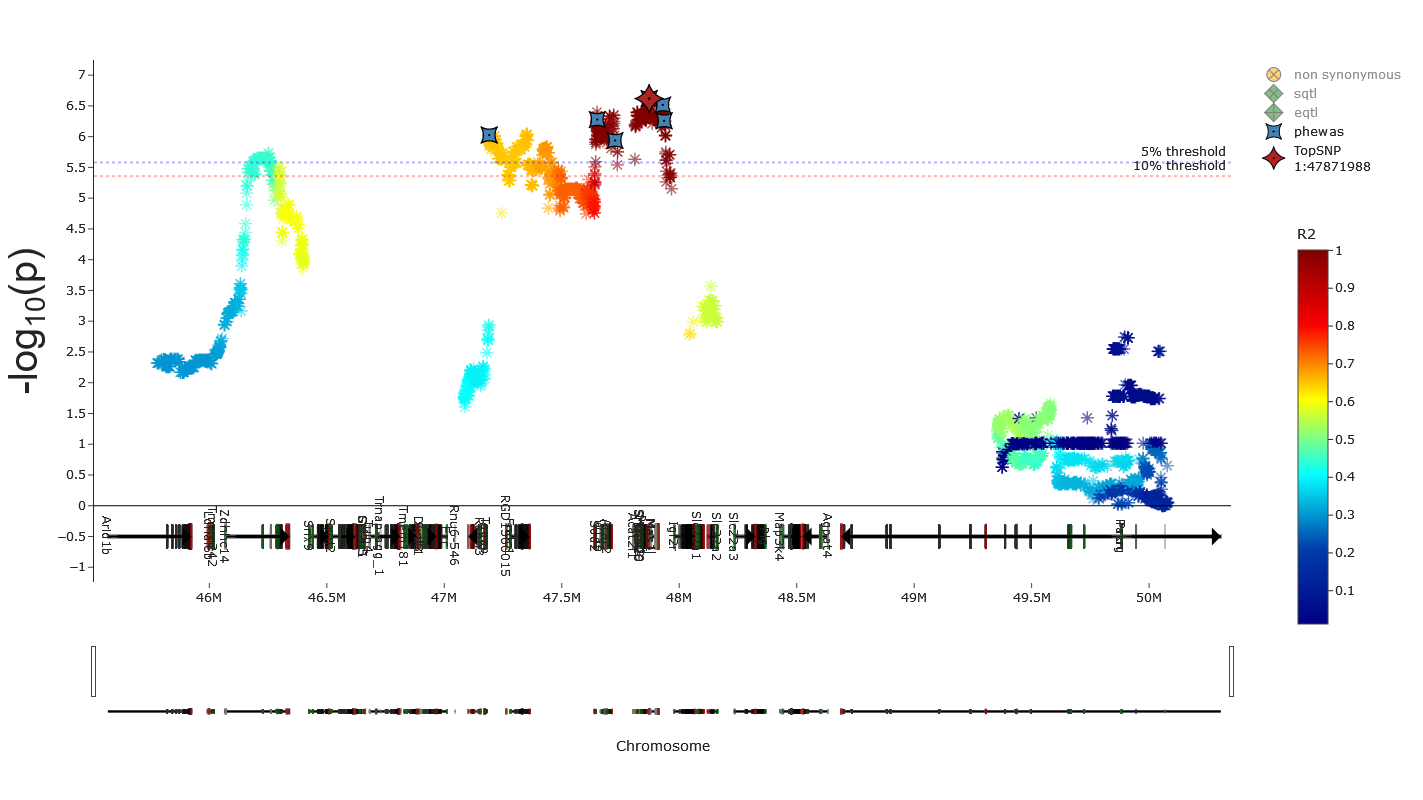

In [28]:
fig = locuszoom_interactive(gwas)
fig

In [ ]:
qtltable:pd.DataFrame() = pd.read_csv(f'results/qtls/finalqtl.csv')
threshold: float = 5.3591
suggestive_threshold: float = 5.58
qtl_r2_thresh: float = .5
padding: float = 5e5
annotate_genome: str = 'rn7'

printwithlog('starting interactive locuszoom generator...')    
printwithlog('reading gene list from NCBI RefSeq from UCSC...')
if not len(qtltable): qtltable = pd.read_csv(f'{self.path}results/qtls/finalqtl.csv')   
linkdict = {'rn7':f'http://hgdownload.soe.ucsc.edu/goldenPath/rn7/bigZips/genes/ncbiRefSeq.gtf.gz' , 
            'rn6':'https://hgdownload.soe.ucsc.edu/goldenPath/rn6/bigZips/genes/rn6.ncbiRefSeq.gtf.gz',
           'm38': 'https://hgdownload.soe.ucsc.edu/goldenPath/mm10/bigZips/genes/mm10.ncbiRefSeq.gtf.gz'}

gtf = pd.read_csv(linkdict['rn7'], sep = '\t', header = None)\
           .set_axis(['Chr', 'source', 'biotype', 'start', 'end', 'score', 'strand', 'phase', 'ID'], axis = 1)
gtf['ID'] = gtf['ID'].apply(lambda x: {y.split(' "')[0].strip(' '): y.split(' "')[-1][:-1] for y in x.strip(';').split(';')})
gtf =pd.concat([gtf.drop('ID', axis = 1), pd.json_normalize(gtf['ID'].to_list())], axis = 1)#.query('biotype == "transcript"')
gtf = gtf[~gtf.Chr.str.lower().str.contains('un')].rename({'gene_id':"gene"}, axis = 1).drop('gene_name', axis = 1)
gtf['Chr'] = gtf['Chr'].map(lambda x: self.replaceXYMTtonums(x.split('_')[0]))

In [ ]:


def glk(gene):
    return f'<a href="https://www.genecards.org/cgi-bin/carddisp.pl?gene={gene}">{gene}</a>'
def rn(x,n = 3):
    try: o = round(float(x), int(n))
    except: o = x
    return o

for _, topsnp in tqdm(qtltable.iloc[:2].reset_index().iterrows()):
    printwithlog(f'starting interactive locuszoom for SNP {topsnp.SNP}...')
    data = pd.read_csv(f'{self.path}results/lz/lzplottable@{topsnp.trait}@{topsnp.SNP}.tsv', sep = '\t')
    data['-log10(P)'] = -np.log10(data.p) 
    minval, maxval = data.query(f'R2 > {qtl_r2_thresh}').agg({'bp': [min, max]}).values.flatten() + np.array([-padding, padding])
    #minval = max(minval, data.bp.min())
    #maxval = min(maxval, data.bp.max())
    genes_in_section = gtf.query(f'Chr == {topsnp.Chr} and  end > {minval} and start < {maxval}').reset_index(drop = True)
    genes_in_section['size'] = genes_in_section.end - genes_in_section.start
    genes_in_section.sort_values('size', ascending=False)
    
    
    causal = pd.read_csv(f'{self.path}results/qtls/possible_causal_snps.tsv' , sep = '\t')\
               .query(f'SNP_qtl == "{topsnp.SNP}"')
    causal['bp'] = causal.SNP.str.extract(':(\d+)')
    causal = causal.merge(data[['SNP', '-log10(P)']], on='SNP')

    phewas = pd.read_csv(f'{self.path}results/phewas/pretty_table_both_match.tsv' , sep = '\t')\
               .query(f'SNP_QTL == "{topsnp.SNP}"')
    phewas['bp'] = phewas.SNP_PheDb.str.extract(':(\d+)')
    phewas = phewas.merge(data[['SNP', '-log10(P)']], left_on='SNP_PheDb', right_on='SNP')

    eqtl = pd.read_csv(f'{self.path}results/eqtl/pretty_eqtl_table.csv' )
    eqtl['SNP'] = eqtl['SNP'].str.replace('chr', '')#\
    eqtl = eqtl.query(f'SNP == "{topsnp.SNP}"')
    eqtl['bp'] = eqtl.SNP_eqtldb.str.extract(':(\d+)')
    eqtl = eqtl.merge(data[['SNP', '-log10(P)']], left_on='SNP_eqtldb', right_on='SNP')

    sqtl = pd.read_csv(f'{self.path}results/sqtl/pretty_sqtl_table.csv' )
    sqtl['SNP'] = sqtl['SNP'].str.replace('chr', '')#\
    sqtl = sqtl.query(f'SNP == "{topsnp.SNP}"')
    sqtl['bp'] = sqtl.SNP_sqtldb.str.extract(':(\d+)')
    sqtl = sqtl.merge(data[['SNP', '-log10(P)']], left_on='SNP_sqtldb', right_on='SNP')

    fig = px.scatter(data_frame=data.query('@minval<bp<@maxval'), x= 'bp', y= '-log10(P)', #hover_data=data.columns,ice_r
                     color = 'R2', color_continuous_scale= 'Jet', hover_data =['R2'])
    fig.update_traces(marker = dict(size=10, opacity = .6, line_color = 'lightgray', line_width = 1,  symbol = 'asterisk-open'),
                      hoverinfo='none', hovertemplate='' )
    fig.add_scattergl(x = causal.bp,y = causal['-log10(P)'],mode='markers', name = 'non synonymous',
                       marker=dict( line_width = 1, size = 14, color ='orange', line_color = 'black',),
                       text = [f'{x.SNP}<br>{glk(x.gene)}:{x.annotation}<br>R2: {x.R2}' for name, x in causal.iterrows()],
                       hovertemplate='%{text}',marker_symbol = 'circle-x',  visible='legendonly')
    fig.add_scattergl(x = sqtl.bp,y = sqtl['-log10(P)'],mode='markers',name = 'sqtl',
                       marker=dict( line_width = 1, size = 14, color ='green', line_color = 'black',),
                      text = [f'{x.SNP_sqtldb}<br>tissue:{x.tissue}<br>gene:{glk(x.Ensembl_gene)}<br>-log10(p): {rn(x["-log10(pval_nominal)"])}<br>R2: {rn(x.R2)}'
                                                       for name, x in sqtl.iterrows()],  hovertemplate='%{text}',
                       marker_symbol = 'diamond-x',  visible='legendonly')
    fig.add_scattergl(x = eqtl.bp,y = eqtl['-log10(P)'],mode='markers',name = 'eqtl',
                       marker=dict( line_width = 1, size = 14, color ='green', line_color = 'black',),
                      text = [f'{x.SNP_eqtldb}<br>tissue:{x.tissue}<br>gene:{glk(x.Ensembl_gene)}<br>-log10(p): {rn(x["-log10(pval_nominal)"])}<br>R2: {rn(x.R2)}'
                                                       for name, x in eqtl.iterrows()],  hovertemplate='%{text}',
                       marker_symbol = 'diamond-cross',  visible='legendonly')
    fig.add_scattergl(x = phewas.bp,y = phewas['-log10(P)'],mode='markers', name = 'phewas', 
                      hovertemplate='%{text}', text = [f'{x.SNP_PheDb}<br>{x.project}:{x.trait_PheDb}<br>-log10(p): {rn(x.p_PheDb)}<br>R2: {rn(x.R2)}'
                                                       for name, x in phewas.iterrows()],
                       marker=dict( line_width = 1, size = 14, color ='steelblue', line_color = 'black',),
                       marker_symbol = 'star-square-dot')
    topsnpcols = ['Freq', 'b', 'se', 'p', 'trait', 'interval_size', 'significance_level']
    fig.add_scattergl(x = [topsnp.bp],y = [topsnp.p],mode='markers',name = 'TopSNP<br>'+ topsnp.SNP,
                       marker=dict( line_width = 1, size = 20, color ='firebrick', line_color = 'black',),
                      hovertemplate = '%{text}', text = ['<br>'.join([f'{k}: {rn(v)}' for k,v in topsnp[topsnpcols].to_dict().items()])],
                       marker_symbol = 'star-diamond-dot')
    translation_table = pd.DataFrame(list(zip(['black', 'gray', 'steelblue', 'black', 'lightblue', 'green', 'red'], 
                                                  [500,500,500,500,500,500,500])),
                                         index =['transcript', 'exon', '5UTR', 'CDS', '3UTR', 'start_codon','stop_codon'], columns = ['color', 'width'])
    already_shown = set()
    for idx, i in genes_in_section.iterrows():
            ini, fin = (i.start, i.end) # if i.strand == "+" else (i.start, i.end)[::-1]
            annotation = glk(i['gene']) if i.biotype =='transcript' else i.biotype
            fig.add_trace(go.Scatter(y=-.5 -(idx%1/2) + np.array([-1, -1, 1, 1, -1])/(5 if i.biotype !='transcript' else 50),#[i.yaxis,i.yaxis], 
                                    x = [ini, fin, fin, ini, ini],
                                    fill='toself', hoverinfo='text',
                                    showlegend=False,hovertemplate = '%{text}',
                                    text=annotation, mode="lines",  opacity=0.5,
                                    marker = dict(color = translation_table.loc[i.biotype, 'color']))) #
            if i.biotype not in ['exon', 'CDS', '3UTR', '5UTR','start_codon','stop_codon']:
                if (i.biotype == 'transcript') and (i.gene in already_shown): pass
                else:
                    fig.add_trace(go.Scatter(x = np.linspace(ini,fin +1e-10, 8), y=8*[-.5 -(idx%1/2)] , text=annotation ,#+ ' ' + i.strand, 
                                                   showlegend=False, hoverinfo='text',  mode='lines',
                                             marker = dict(color = translation_table.loc[i.biotype, 'color']),
                                                  textposition="bottom center"))
                    already_shown.add(i.gene)
            if i.biotype =='transcript':
                _, __ = i[['start', 'end']][:: -1 if i.strand == '-' else 1]
                fig.add_annotation(x=__, y=-.5,ax=_, ay=-.5,
                  xref='x', yref='y', axref='x', ayref='y',text='',  
                  showarrow=True,arrowhead=1,arrowsize=1, arrowwidth=3, arrowcolor='black')

    fig.add_hline(y=threshold, line_width=2,  line_color="red", annotation_text="10% threshold",  line_dash="dot",
                  annotation_position="top right")
    fig.add_hline(y=suggestive_threshold, line_width=2, line_color="blue", annotation_text="5% threshold",  line_dash="dot",
                  annotation_position="top right")
    fig.add_hline(y=0, line_width=1, line_color="black", opacity = 1)
    fig.update_xaxes(showline=False, title="Chromosome",rangeslider=dict( visible=True), range=[minval+padding, maxval-padding])
    fig.update_yaxes(title="-log<sub>10</sub>(p)", title_font_family="Arial",
                     title_font_size = 40, tick0 = 0, tickmode = 'linear', dtick = 0.5)
    fig.update_layout(   template='simple_white',width = 1200, height = 800, coloraxis_colorbar_x=1.05,
                      coloraxis_colorbar_y = .3,coloraxis_colorbar_len = .8,
                       hovermode='x unified')
    fig.show()
    fig.write_html(f'{self.path}images/lz/lz__{topsnp.trait}__{topsnp.SNP}.html'.replace(':', '_'))

In [ ]:
genes_in_section[~genes_in_section.gene.str.startswith('LOC')].gene.unique()

In [ ]:
fig.write_html('test.html')

In [ ]:
fig.add_scattergl(x = df_gwas['Chromosome'].values,y = -np.log10(df_gwas['p']), name = '', 
                   mode='markers', marker=dict(color=df_gwas.color,line_width=0), showlegend = False)

In [ ]:
fig2 =  go.Figure(data=[])
fig2.add_scattergl(x = df_gwas['Chromosome'].values,y = -np.log10(df_gwas['p']), name = '', 
                   mode='markers', marker=dict(color=df_gwas.color,line_width=0), showlegend = False)
for name, ite in tqdm(df_gwas.query('annotate').sort_values('trait').groupby('trait')):
    fig2.add_scattergl(x = ite.Chromosome,y = -np.log10(ite.p),mode='markers',name = f"{name} ({tnum[name]+1})",
                   marker=dict( line_width=1, size = 15, color ='rgb({},{},{})'.format(*ite.color.iloc[0]) ),
                   marker_symbol = 'star-diamond-dot')
for x in append_position.values: fig2.add_vline(x=x, line_width=1, line_dash="dash", line_color="gray")
fig2.add_hline(y=threshold, line_width=2,  line_color="red")
fig2.add_hline(y=suggestive_threshold, line_width=2, line_color="blue")
if qtl_annotation: 
    showlegend = True
    df_gwas.query('annotate')\
           .apply(lambda x: fig2.add_annotation(x=x.Chromosome, y=-np.log10(x.p),
                                                text=f"({tnum[x.trait]+1})",showarrow=True,arrowhead=2), axis = 1)
else:showlegend = True
printwithlog(f'starting porcupineplot ... {self.project_name} making figure')
fig2.update_layout(yaxis_range=[0,max(6, -np.log10(df_gwas.p.min())+.5)],
                   xaxis_range = df_gwas.Chromosome.agg(['min', 'max']),
                   template='simple_white',width = 1920, height = 800,  
                   showlegend=showlegend , xaxis_title="Chromosome", yaxis_title="-log10(p)")
dfgwasgrouped = df_gwas.groupby('Chr')
fig2.update_xaxes(ticktext = [self.replacenumstoXYMT(names) for names,dfs in dfgwasgrouped],
          tickvals =(append_position + dfgwasgrouped.bp.agg('max').sort_index().cumsum())//2 )
printwithlog(f'starting porcupineplot ... {self.project_name} saving figure')
if 'png' in save_fmt: fig2.write_image(f"{self.path}images/porcupineplot.png",width = 1920, height = 800)
if display: fig2.show(renderer = 'png',width = 1920, height = 800)

In [ ]:
gwas.make_heritability_figure()

In [ ]:
sns.color_palette("tab20", n_colors=30)

In [ ]:
def porcupineplot(self, qtltable: pd.DataFrame(), traitlist: list = [], threshold: float = 5.3591, run_only_qtls = True,
                  suggestive_threshold: float = 5.58, save_fmt: list = ['html', 'png'], display: bool = True,
                  low_mem = False, childlock = True, qtl_annotation: bool = False):
    printwithlog(f'starting porcupineplot ... {self.project_name} reading files')
    samplen = int(1e5) if low_mem else int(5e5) 
    rangen = range(160,180) if low_mem else range(80,90)
    maxtraits = 10
    if len(traitlist) == 0: 
        if run_only_qtls: traitlist = list(qtltable.trait.unique())[:2]
        else: traitlist = self.traits
    qtl = qtltable.query('QTL==True')
    df_gwas,df_date = [], []
    #chrlist = [str(i) if i!=self.n_autosome+1 else 'x' for i in range(1,self.n_autosome+2)]
    for trait_pos, t in tqdm(list(enumerate(traitlist))):
        if childlock == True: childlock_val = np.inf if trait_pos < maxtraits else 0
        for opt in [f'regressedlr_{t.replace("regressedlr_", "")}.loco.mlma', 
                    f'regressedlr_{t.replace("regressedlr_", "")}.mlma']+ \
        [f'regressedlr_{t.replace("regressedlr_", "")}_chrgwas{chromp2}.mlma' for chromp2 in self.chrList]:
            if glob(f'{self.path}results/gwas/{opt}'): 
                g = pd.read_csv(f'{self.path}results/gwas/{opt}', sep = '\t', dtype = {'Chr': int, 'bp': int}).assign(trait = t)
                g['p'] = g['p'].fillna(1)
                #g=g.applymap(np.nan_to_num)
                g['inv_prob'] = 1/(np.clip(g.p, 1e-6, 1)) 
                g = pd.concat([g.query('p < 1e-4'),\
                               g[::np.random.choice(500)].sample(frac = (trait_pos< maxtraits))] )\
                .sort_values(['Chr', 'bp']).reset_index(drop = True).dropna()
                df_gwas += [g]
            else: pass
    df_gwas = pd.concat(df_gwas).sort_values(['Chr', 'bp']).reset_index(drop = True)

    append_position = df_gwas.groupby('Chr').bp.agg('max').sort_index().cumsum().shift(1,fill_value=0)
    df_gwas['Chromosome'] = df_gwas.apply(lambda row: row.bp + append_position[row.Chr], axis = 1)
    cmap = sns.color_palette("tab20", len(traitlist))
    d = {t: cmap[v] for v,t in enumerate(sorted(traitlist))}
    tnum = {t:num for num,t in enumerate(sorted(traitlist))}
    def mapcolor(c, thresh , p, trait):
        if -np.log10(p)> thresh : return d[trait] 
        elif int(str(c).replace('X',str(self.n_autosome+1)).replace('Y', str(self.n_autosome+2)).replace('MT', str(self.n_autosome+4)))%2 == 0: return 'black'
        return 'gray'
    printwithlog(f'starting porcupineplot ... {self.project_name} colorcoding')
    df_gwas['color']= df_gwas.progress_apply(lambda row: mapcolor(row.Chr, threshold, row.p, row.trait) ,axis =1)
    df_gwas['annotate'] = (df_gwas.SNP + df_gwas.trait.str.replace('regressedlr_', '') ) .isin(qtl.reset_index().SNP+qtl.reset_index().trait.str.replace('regressedlr_', ''))
    df_gwas.trait = df_gwas.trait.str.replace('regressedlr_', '')
    fig2 =  go.Figure(data=[])
    fig2.add_scattergl(x = df_gwas['Chromosome'].values,y = -np.log10(df_gwas['p']), name = '', 
                       mode='markers', marker=dict(color=df_gwas.color,line_width=0), showlegend = False)
    for name, ite in tqdm(df_gwas.query('annotate').sort_values('trait').groupby('trait')):
        fig2.add_scattergl(x = ite.Chromosome,y = -np.log10(ite.p),mode='markers',name = f"{name} ({tnum[name]+1})",
                           marker=dict( line_width=1, size = 15, color ='rgb({},{},{})'.format(*ite.color.iloc[0]) ),
                           marker_symbol = 'star-diamond-dot')
        print(ite.color.iloc[0])
        print(ite.color)
    
    for x in append_position.values: fig2.add_vline(x=x, line_width=1, line_dash="dash", line_color="gray")
    fig2.add_hline(y=threshold, line_width=2,  line_color="red")
    fig2.add_hline(y=suggestive_threshold, line_width=2, line_color="blue")
    if qtl_annotation: 
        showlegend = True
        df_gwas.query('annotate')\
               .apply(lambda x: fig2.add_annotation(x=x.Chromosome, y=-np.log10(x.p),
                                                    text=f"({tnum[x.trait]+1})",showarrow=True,arrowhead=2), axis = 1)
    else:showlegend = True
    printwithlog(f'starting porcupineplot ... {self.project_name} making figure')
    fig2.update_layout(yaxis_range=[0,max(6, -np.log10(df_gwas.p.min())+.5)],
                       xaxis_range = df_gwas.Chromosome.agg(['min', 'max']),
                       template='simple_white',width = 1920, height = 800,  
                       showlegend=showlegend , xaxis_title="Chromosome", yaxis_title="-log10(p)")
    dfgwasgrouped = df_gwas.groupby('Chr')
    fig2.update_xaxes(ticktext = [self.replacenumstoXYMT(names) for names,dfs in dfgwasgrouped],
              tickvals =(append_position + dfgwasgrouped.bp.agg('max').sort_index().cumsum())//2 )
    printwithlog(f'starting porcupineplot ... {self.project_name} saving figure')
    if display: fig2.show(renderer = 'png',width = 1920, height = 800)
    return fig2, df_gwas


In [ ]:
_ = porcupineplot(gwas, pd.read_csv(f'results/qtls/finalqtl.csv'), display = True, qtl_annotation=True, low_mem = True)

In [ ]:
_[0]['data'][0]

In [ ]:
from hdbscan import HDBSCAN

def make_heritability_figure(self, traitlist: list = [], save_fmt = ['png', 'html'], display = True):
    if os.path.isfile(f'{self.path}results/heritability/heritability.tsv'): pass
    else:  self.snpHeritability()
    her = pd.read_csv(f'{self.path}results/heritability/heritability.tsv', sep = '\t', 
                      index_col=0).rename(lambda x: x.replace('regressedlr_', ''))
    her = her[~(her == 'Fail').all(1)].astype(float)
    her = her.rename({'V(G)/Vp': 'heritability'}, axis = 1).sort_values('heritability').dropna(subset = 'heritability')
    
    traitlist = pd.Series(her.index if not len(traitlist) else traitlist).str.replace('regressedlr_', '')
    her = her.loc[her.index.isin(traitlist)]
    
    if os.path.isfile(f'{self.path}results/heritability/genetic_correlation_matrix_justgenetic.csv'): pass
    else: self.genetic_correlation_matrix()
    
    gcor = pd.read_csv(f'{self.path}results/heritability/genetic_correlation_matrix_justgenetic.csv', 
                       index_col=0).applymap(lambda x: float(x.split('+-')[0]))
    classes = pd.DataFrame(HDBSCAN(metric = 'precomputed').fit_predict(gcor.loc[her.index, her.index]), 
                           index = her.index, columns = ['cluster']).astype(str)
    her = pd.concat([classes, her], axis = 1)
    fig = px.scatter(her.reset_index(names = 'trait'), x="trait", y="heritability", color="cluster", error_y="heritability_SE")
    fig.add_hline(y=0., line = {'color':'black', 'width': 3}, opacity= .7)
    for i in [0.1,0.2, 0.3]:
        fig.add_hline(y=i, line = {'color':'black', 'width': .7}, opacity= .7, line_dash="dot")
    fig.update_layout( template='simple_white',width = 1000, height = 800, showlegend=False)
    fig.write_html()
    
    for fmt in save_fmt:
        if fmt == 'html': fig.write_html(f"{self.path}images/heritability_sorted.html")
        else: fig.write_image(f"{self.path}images/heritability_sorted.{fmt}",width = 1920, height = 1200)
    if display: fig.show(renderer = 'png',width = 1920, height = 1200)
    fig.show()

In [ ]:
gwas.callQTLs()

In [ ]:
import pandas_plink
import dask.array as da
pbim, pfam, pgen = pandas_plink.read_plink(gwas.genotypes_subset)

In [ ]:
threshold = 3.5

In [ ]:
out = pd.read_csv('results/qtls/finalqtl.csv')
out

In [ ]:
for (C, T), tempdf in out.groupby(['Chr', 'trait']):
    if tempdf.shape[0] > 1:
        display(tempdf)

In [ ]:
def conditional_analysis(trait: str, snpdf: pd.DataFrame() = pd.DataFrame(), threshold: float = 5.3591):
    os.makedirs(f'{gwas.path}results/cojo', exist_ok=True)
    os.makedirs(f'{gwas.path}temp/cojo',exist_ok=True)
    if not snpdf.shape[0]: print(f'running conditional analysis for trait {trait} and all snps above threshold {threshold}')
    else: 
        display(snpdf.shape)
        snpstring = ' '.join(snpdf.SNP)
        print(f'running conditional analysis for trait {trait} and all snps below threshold {snpstring}')
    
    pbimtemp = pbim.assign(n = gwas.df.count()[trait] ).rename({'snp': 'SNP', 'n':'N'}, axis = 1)[['SNP', 'N']] #- da.isnan(pgen).sum(axis = 1)
    tempdf = pd.concat([pd.read_csv(f'{gwas.path}results/gwas/{trait}.loco.mlma', sep = '\t'),
                       pd.read_csv(f'{gwas.path}results/gwas/{trait}_chrgwasx.mlma', sep = '\t')]).rename({'Freq': 'freq'}, axis =1 )
    tempdf = tempdf.merge(pbimtemp, on = 'SNP')[['SNP','A1','A2','freq','b','se','p','N' ]]
    mafile, snpl = f'{gwas.path}temp/cojo/tempmlma.ma', f'{gwas.path}temp/cojo/temp.snplist'
    tempdf.to_csv(mafile, index = False, sep = '\t')
    tempdf[-np.log10(tempdf.p) >threshold][['SNP']].to_csv(snpl, index = False, header = None,sep = '\t')
    mafile, snpl = f'{gwas.path}temp/cojo/tempmlma.ma', f'{gwas.path}temp/cojo/temp.snplist'
    tempdf.to_csv(mafile, index = False, sep = '\t')
    if not snpdf.shape[0]:
        tempdf[-np.log10(tempdf.p) >threshold][['SNP']].to_csv(snpl, index = False, header = None,sep = '\t')
    else: snpdf[['SNP']].to_csv(snpl, index = False, header = None,sep = '\t')
    cojofile = f'{gwas.path}temp/cojo/tempcojo'
    gwas.bashLog(f'{gwas.gtca} {gwas.thrflag} --bfile {gwas.genotypes_subset} --cojo-slct --cojo-collinear 0.99 --cojo-p {10**-threshold} \
                --cojo-file {mafile} --cojo-cond {snpl} --out {cojofile}', f'cojo_test', print_call=False)
    return pd.read_csv(f'{cojofile}.jma.cojo', sep = '\t')

def conditional_analysis_filter(qtltable)
    return qtltable.groupby(['Chr', 'trait']).progress_apply(lambda df: df.loc[df.SNP.isin(conditional_analysis('regressedlr_' +df.name[1].replace('regressedlr_', ''), df))]
                                                        if df.shape[0] > 1 else df)

In [ ]:
if pd.DataFrame().shape[0]: print('yes')

In [ ]:
conditional_analysis(gwas.traits[0])

In [ ]:
out

In [ ]:
out.groupby(['Chr', 'trait']).progress_apply(lambda df: df.loc[df.SNP.isin(conditional_analysis('regressedlr_' +df.name[1], df))] if df.shape[0] > 1 else df)

In [ ]:
out.SNP.isin(pd.Series(['5:161466480']))

In [ ]:

traitlist = gwas.traits[:2]
ranges =  gwas.chrList #range(1,nchr+1)

        
for trait, chrom in tqdm(list(itertools.product(traitlist,ranges))):
    gwas.bashLog(f'{self.gtca} {self.thrflag} --bfile {self.genotypes_subset} --chr {chrom} --cojo-file {gwas.path}results/gwas/{trait}.loco.mlma --cojo-cond cond.snplist --out test_chr1')
    
    
    
    self.bashLog(f'{self.gtca} {self.thrflag} --pheno {self.path}data/pheno/{trait}.txt --bfile {self.genotypes_subset} \
                               --grm {self.path}grm/AllchrGRM \
                               --autosome-num 20\
                               --chr {chrom} \
                               --mlma-subtract-grm {self.path}grm/{chromp2}chrGRM \
                               --mlma \
                               --out {self.path}results/gwas/{trait}_chrgwas{chromp2}', 
                f'GWAS_{chrom}_{trait}', print_call = print_call)

In [ ]:
traitlist = gwas.traits[:5]
d_ = {t: str(num) for num, t in enumerate(['rfid']+ traitlist)} 
gwas.df[['rfid', 'rfid']+ traitlist].fillna('NA').to_csv(f'{gwas.path}data/allpheno.txt', sep = '\t', header = None, index = False)
outg = pd.DataFrame()
outp = pd.DataFrame()
for trait1, trait2 in tqdm(list(itertools.combinations(traitlist, 2))):
    gwas.bashLog(f'''{gwas.gtca} --reml-bivar {d_[trait1]} {d_[trait2]} {gwas.thrflag} \
        --grm {gwas.autoGRM} --pheno {gwas.path}data/allpheno.txt --reml-maxit 1000 \
        --reml-bivar-lrt-rg 0 --out {gwas.path}temp/gencorr.temp''', 'genetic_correlation', print_call=False)
    temp = pd.read_csv(f'{gwas.path}temp/gencorr.temp.hsq', sep = '\t',dtype= {'Variance': float}, index_col=0 ,skipfooter=6)
    outg.loc[trait1, trait2] = f"{temp.loc['rG', 'Variance']}+-{temp.loc['rG', 'SE']}"
    outg.loc[trait2, trait1] = f"{temp.loc['rG', 'Variance']}+-{temp.loc['rG', 'SE']}"
    if os.path.exists(f'{gwas.path}logerr/genetic_correlation.log'):
        outg.loc[trait1, trait2] = f"0 +- *"
        outg.loc[trait2, trait1] = f"0 +- *"
        bash(f'rm {gwas.path}logerr/genetic_correlation.log')
    phecorr = str(gwas.df[[trait1, trait2]].corr().iloc[0,1])
    outp.loc[trait2, trait1] = phecorr.replace('nan', '0')+ ' +- ' + ( '*' if 'nan' in phecorr else '0')
    outp.loc[trait1, trait2] = phecorr.replace('nan', '0')+ ' +- ' + ( '*' if 'nan' in phecorr else '0')
    #out.loc[trait2, trait1] = out.loc[trait1, trait2] 
outg = outg.fillna('1+-0').rename(lambda x: x.replace('regressedlr_', '')).rename(lambda x: x.replace('regressedlr_', ''), axis = 1)
outp = outp.fillna('1+-0').rename(lambda x: x.replace('regressedlr_', '')).rename(lambda x: x.replace('regressedlr_', ''), axis = 1)

hieg = linkage(distance.pdist(outg.applymap(lambda x: float(x.split('+-')[0])).T)) #method='average'
lk = leaves_list(hieg)
outg = outg.loc[[x.replace('regressedlr_', '') for x in traitlist], [x.replace('regressedlr_', '') for x in traitlist]].iloc[lk, lk]
outp = outp.loc[[x.replace('regressedlr_', '') for x in traitlist], [x.replace('regressedlr_', '') for x in traitlist]].iloc[lk, lk] 
hie = linkage(distance.pdist(outg.applymap(lambda x: float(x.split('+-')[0])).T)) #, method='euclidean'
outg.to_csv(f'{gwas.path}results/heritability/genetic_correlation_matrix.csv')
outmixed = outg.mask(np.triu(np.ones_like(outg, dtype=bool))).fillna('')  +  outp.mask(np.tril(np.ones_like(outg, dtype=bool), -1)).fillna('')
if not os.path.isfile(gwas.heritability_path): gwas.snpHeritability()
H2 = pd.read_csv(gwas.heritability_path, sep = '\t', index_col= 0)
H2['her_str'] = H2['V(G)/Vp'].round(3).astype(str) + ' +- ' + H2.heritability_SE.round(3).astype(str)
for i in outmixed.columns: outmixed.loc[i,i] =  H2.loc['regressedlr_'+i, 'her_str']
#outmixed.to_csv(f'{gwas.path}results/heritability/genetic_correlation_matrix.csv')
a = sns.clustermap(outmixed.applymap(lambda x: float(x.split('+-')[0])).copy().T,  cmap="RdBu_r", col_cluster= False, row_cluster=False,
        annot=outmixed.applymap(lambda x: '' if '*' not in x else '*').copy().T, vmin =-1, vmax =1, center = 0 , fmt = '', square = True, linewidth = .3 )
dendrogram(hie, ax = a.ax_col_dendrogram)
display(a)
#plt.savefig(f'{gwas.path

In [ ]:
outmixed

In [ ]:
H2 = pd.read_csv(gwas.heritability_path, sep = '\t', index_col= 0)
H2['her_str'] = H2['V(G)/Vp'].round(3).astype(str) + ' +- ' + H2.heritability_SE.round(3).astype(str)
for i in outmixed.columns: outmixed.loc[i,i] =  H2.loc['regressedlr_'+i, 'her_str']

In [ ]:
outmixed.columns

In [ ]:
a = sns.clustermap(outmixed.applymap(lambda x: float(x.split('+-')[0])).copy().T,  cmap="RdBu_r", col_cluster= False, row_cluster=False,
        annot=outmixed.applymap(lambda x: '' if '*' not in x else '*').copy().T, vmin =-1, vmax =1, center = 0 , fmt = '', square = True, linewidth = .3 )
dendrogram(hie, ax = a.ax_col_dendrogram)
display(a)

In [ ]:
gwas = gwas_pipe(path = f'',
             all_genotypes = '/projects/ps-palmer/tsanches/gwaspipeline/gwas/zzplink_genotypes/round10', #'round9_1.vcf.gz',
             data = 'db_u01_olivier_george_oxycodone.gwas_phenotypes.csv',
             project_name = 'tempttemp',
             df = pd.read_csv(dtype = {'rfid': str})
             traits = [] ,
             trait_descriptions= [],
             threads = 8)